In [1]:
# Data used is from Connecticut data observing Accused Pre-Trial Inmates in Correctional Facilities
# https://data.ct.gov/Public-Safety/Accused-Pre-Trial-Inmates-in-Correctional-Faciliti/b674-jy6w

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go 
import cufflinks as cf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set a custom color palette for the graphs
sns.set_palette("Blues_r")

In [4]:
#Load dataset
data = pd.read_csv('/Users/saralarue/Desktop/Desktop/Desktop/data/Bail Project app data/Accused_Pre-Trial_Inmates_in_Correctional_Facilities.csv')

In [5]:
#Show data head
data.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [6]:
#Check if there is any missing data
data.isnull().sum()

DOWNLOAD DATE                                       0
IDENTIFIER                                          0
LATEST ADMISSION DATE                               0
RACE                                                0
GENDER                                              0
AGE                                                 0
BOND AMOUNT                                         0
OFFENSE                                             0
FACILITY                                            0
DETAINER                                            0
dtype: int64

Great, there is no empty data

In [7]:
#Show data info and check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5629469 entries, 0 to 5629468
Data columns (total 10 columns):
 #   Column                                            Dtype 
---  ------                                            ----- 
 0   DOWNLOAD DATE                                     object
 1   IDENTIFIER                                        object
 2   LATEST ADMISSION DATE                             object
 3   RACE                                              object
 4   GENDER                                            object
 5   AGE                                               int64 
 6   BOND AMOUNT                                       int64 
 7   OFFENSE                                           object
 8   FACILITY                                          object
 9   DETAINER                                          object
dtypes: int64(2), object(8)
memory usage: 429.5+ MB


In [8]:
#Check to make sure this worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5629469 entries, 0 to 5629468
Data columns (total 10 columns):
 #   Column                                            Dtype 
---  ------                                            ----- 
 0   DOWNLOAD DATE                                     object
 1   IDENTIFIER                                        object
 2   LATEST ADMISSION DATE                             object
 3   RACE                                              object
 4   GENDER                                            object
 5   AGE                                               int64 
 6   BOND AMOUNT                                       int64 
 7   OFFENSE                                           object
 8   FACILITY                                          object
 9   DETAINER                                          object
dtypes: int64(2), object(8)
memory usage: 429.5+ MB


Yes, it did worked.

In [9]:
#Check the minimum, maximum, and average amount for bail amount
data['BOND AMOUNT'].min()

1

In [10]:
data['BOND AMOUNT'].max()

9999998

In [11]:
data['BOND AMOUNT'].mean()

252752.7556149612

In [12]:
#Get value counts for male and female
data['GENDER'].value_counts()

M    5097093
F     532376
Name: GENDER, dtype: int64

In [13]:
#Make dataframe for gender
gender=data['GENDER'].value_counts()

In [14]:
#Get percentage of Female vs Male 
percent=((gender)['F']/gender['M']*100).round(2)
percent

10.44

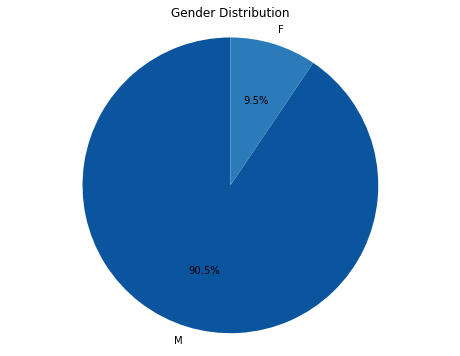

In [15]:
#Graph gender percentage
# plot=gender.plot.pie(subplots=True, figsize=(11, 6))

# Graph gender percentage
plt.figure(figsize=(8, 6))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

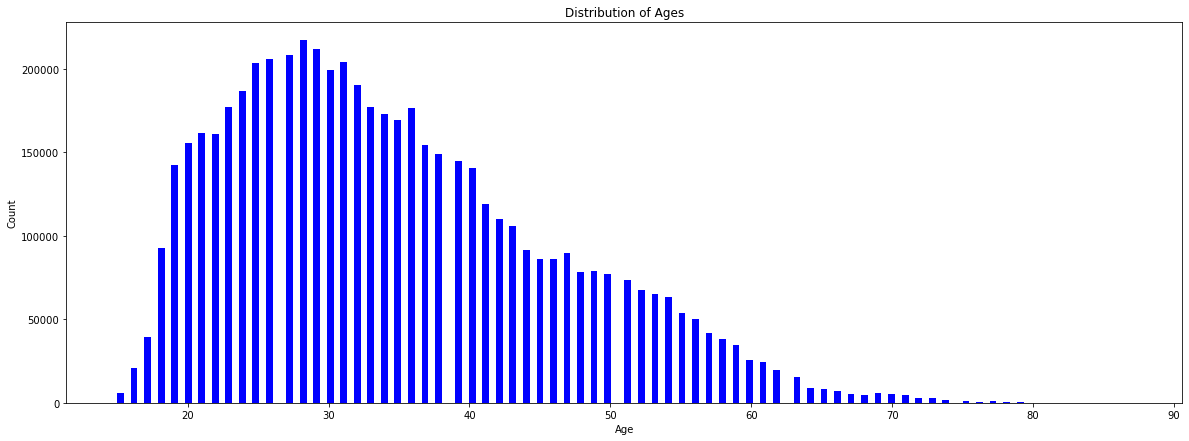

In [16]:
#Age distribution to see what age most people are
plt.figure(figsize=(20,7))
h = plt.hist(pd.to_numeric(data.AGE).dropna(), facecolor='b', bins=150)
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count")

In [17]:
#To check the average age
data['AGE'].mean()

34.65498255696941

In [18]:
#Get value counts for race
race=data['RACE'].value_counts() 

In [19]:
#Get percentage for race
data['RACE'].value_counts(normalize=True)

BLACK       0.413464
WHITE       0.308945
HISPANIC    0.268549
ASIAN       0.005928
AMER IND    0.003113
Name: RACE, dtype: float64

In [20]:
data['DOWNLOAD DATE']=pd.DatetimeIndex(data['DOWNLOAD DATE']).year

In [21]:
#Create pivot table for year and race for bond amount
pivot=pd.pivot_table(data,index=['DOWNLOAD DATE','RACE'], values=['BOND AMOUNT'], aggfunc='sum', margins=True)
pivot

BOND AMOUNT
DOWNLOAD DATE RACE                   
2016          AMER IND      122941150
              ASIAN         361479745
              BLACK       45553875860
              HISPANIC    23118237332
              WHITE       19417175595
2017          AMER IND      361883750
              ASIAN         947660793
              BLACK      116140128558
              HISPANIC    57662445852
              WHITE       56752171316
2018          AMER IND      771540500
              ASIAN        2196963277
              BLACK      144967785585
              HISPANIC    76516143366
              WHITE       62742566911
2019          AMER IND      478308950
              ASIAN        2174453459
              BLACK      154190446273
              HISPANIC    88558111984
              WHITE       59786652002
2020          AMER IND      504375900
              ASIAN         864056958
              BLACK      164972336058
              HISPANIC    94397431466
              WHITE       58852961638
2021          AMER IND      643282000
              ASIAN         759802838
              BLACK      101623362738
              HISPANIC    53816820675
              WHITE       33608399870
All                     1422863802399

In [22]:
#Drop all row
pivot=pivot.drop("All")

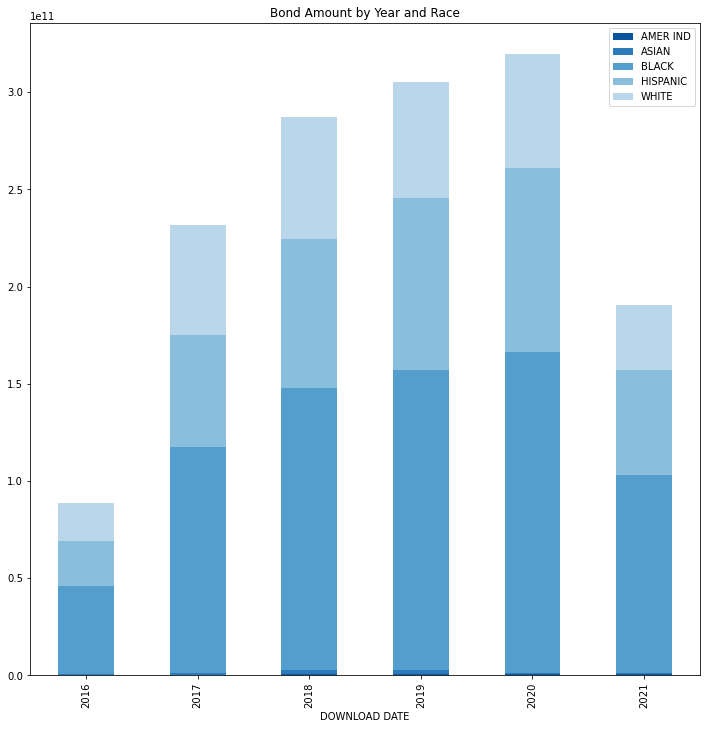

In [23]:
#Create graph to display the amount of bond per year and race
pivot.groupby(['DOWNLOAD DATE', 'RACE'])['BOND AMOUNT'].sum().unstack().plot.bar(stacked=True,title='Bond Amount by Year and Race', figsize=(12,12));
#Move the legend to the upper right corner.
plt.legend(loc='upper right')


In [24]:
#An interactive way to view the info above
pivot.iplot(kind='bar')

In [25]:
#Create dataframe for average bond amount per age and race
racemean=data.groupby('RACE').mean()

In [26]:
#Reset index
racemean.reset_index(inplace=True)

In [27]:
#Drop download date
racemean.drop(columns=['DOWNLOAD DATE'])

,RACE,AGE,BOND AMOUNT
0,AMER IND,32.050325,164460.358895
1,ASIAN,34.959966,218878.612909
2,BLACK,33.276910,312533.483248
3,HISPANIC,33.638980,260664.319782
4,WHITE,37.402817,167410.358063


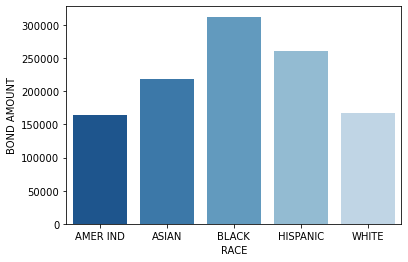

In [28]:
#Graph
sns.barplot(x='RACE', y='BOND AMOUNT', data=racemean)